In [37]:
import os
from PIL import Image
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [17]:
def load_mnist_data(datafolder):
    data = []
    labels = []

    for root, _, files in os.walk(datafolder):
        for file in files:
            if file.endswith(".png"):
                image_path = os.path.join(root, file)
                try:
                    with Image.open(image_path) as image:
                        # Convert the image to grayscale and then to a numpy array
                        img_array = np.array(image.convert('L'), dtype='uint8')
                        # Check if the image has non-zero pixel values
                        if np.any(img_array != 0):
                            data.append(img_array.ravel())  # Flatten the image using ravel()
                            label = os.path.basename(os.path.dirname(image_path))
                            labels.append(label)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

    return data, labels

In [18]:
target_path = r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Machine Learning\ML assignments\Image data\New folder"
data, labels = load_mnist_data(target_path)

In [19]:
#Convert the list of pixel arrays to a numpy array
data_array = np.array(data)

#Scale the pixel values to the range [0, 1]
data_array = data_array.astype('float32') / 255.0

In [20]:
#Create a new dataframe with columns based on the number of pixels in the flattened image
pixels_df = pd.DataFrame(data_array, columns=[f'pixel{i}' for i in range(len(data_array[0]))])

#Create the final dataframe with the 'Label' column
labels_df = pd.DataFrame(pd.Series(labels, name='Label'))

mnist_df = pd.concat([pixels_df, labels_df], axis = 1)


#Display the vectorized image dataframe
print(mnist_df.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  Label  
0       0.0       0.0      

In [21]:
pixels_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
labels_df.head()

,Label
0,A
1,A
2,A
3,A
4,A


In [24]:
mnist_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A


In [25]:
mnist_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Z
372447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Z
372448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Z
372449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Z


In [26]:
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 785 entries, pixel0 to Label
dtypes: float32(784), object(1)
memory usage: 1.1+ GB


In [28]:
mnist_df.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Label       0
Length: 785, dtype: int64

In [31]:
mnist_df.to_csv("image_project.csv")

# start from here

In [18]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Machine Learning\ML assignments\Image data\image_project.csv")

In [19]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [20]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A


In [21]:
df.shape

(372451, 785)

In [22]:
df.Label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

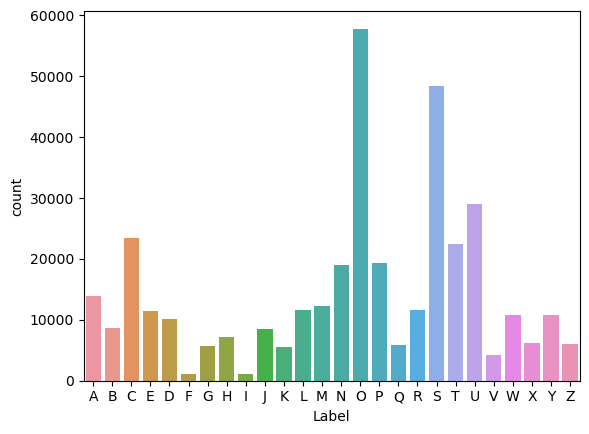

In [23]:
sns.countplot(data=df, x='Label')

In [65]:

for i in df:
    a = i.resize(400,400)


AttributeError: 'str' object has no attribute 'resize'

In [24]:
df.shape

(372451, 785)

In [25]:
X = df.drop('Label', axis=1)

y = df['Label']

In [26]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X.shape

(372451, 784)

In [28]:
idx = np.random.randint(0, 372450, 9)

print(idx)

[   905 329407 361074 169358 158757 309301 317830  34330 193127]


In [29]:
idx[4]

158757

In [30]:
y[idx[4]]

'O'

In [31]:
print(y[idx[4]])

print(np.reshape(X.values[idx[4]], (28,28)))

img = np.reshape(X.values[idx[4]], (28,28))

O
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

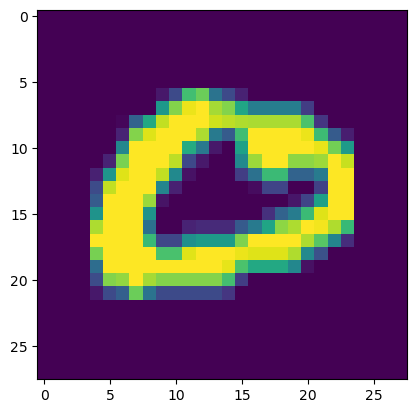

In [32]:
plt.imshow(img)

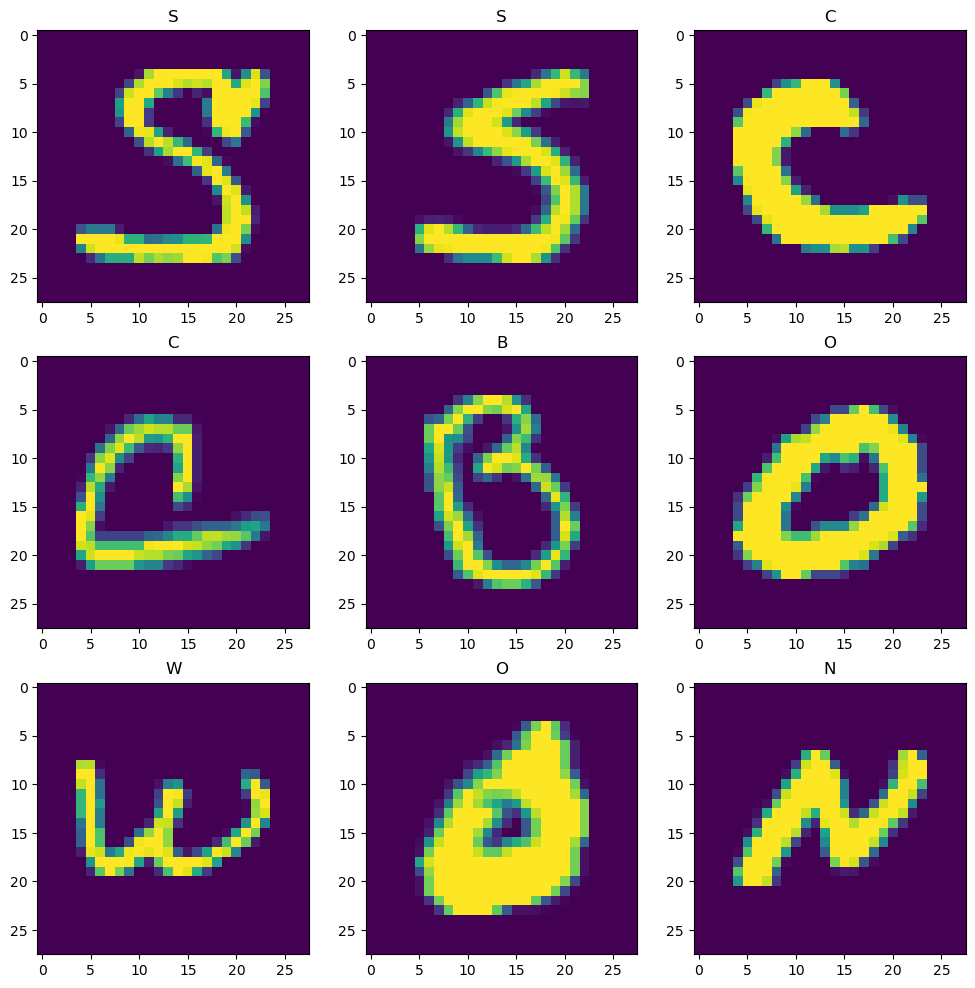

In [33]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, 372450, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y[idx[i]])
    img_grid = np.reshape(X.values[idx[i]], (28,28))
    plt.imshow(img_grid)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [35]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
223042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

start_time = time.time()
log.fit(X_train, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 124.15645432472229 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
start_time = time.time()
log_y_test_pred = log.predict(X_test)
end_time = time.time()
print('Execution time:',end_time - start_time,"seconds")

Execution time: 3.8314967155456543 seconds


In [52]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8791468430831355
              precision    recall  f1-score   support

           A       0.84      0.85      0.85      3498
           B       0.87      0.79      0.83      2210
           C       0.91      0.89      0.90      5911
           D       0.82      0.79      0.81      2533
           E       0.83      0.80      0.82      2812
           F       0.93      0.86      0.89       290
           G       0.84      0.75      0.79      1473
           H       0.77      0.75      0.76      1789
           I       0.90      0.81      0.85       297
           J       0.77      0.79      0.78      2158
           K       0.76      0.77      0.77      1363
           L       0.91      0.94      0.93      2891
           M       0.88      0.88      0.88      3088
           N       0.81      0.81      0.81      4792
           O       0.93      0.96      0.95     14651
           P       0.89      0.92      0.90      4759
           Q       0.86      0.77      0.81      1519
        

In [53]:
# print the confusion matrix
from sklearn import metrics
con_metrics = metrics.confusion_matrix(y_test, y_test_pred)
con_metrics

array([[ 2973,     8,     1,     9,    17,     0,     4,    57,     0,
            6,    16,     2,    73,    64,    20,    51,    17,    32,
           22,     0,    41,     4,     5,    37,    33,     6],
       [   19,  1754,    11,    28,    58,     0,     3,    10,     0,
            7,     5,     1,    16,     4,    59,     5,     2,    24,
          130,     0,    35,     0,     0,     3,    14,    22],
       [    3,    20,  5267,     1,    70,     0,    38,     4,     0,
            9,    15,    63,     1,    24,   178,    47,     4,    33,
           33,    10,    69,     0,     3,     1,    15,     3],
       [    2,    16,     2,  2002,     3,     0,     0,     2,     1,
           38,     1,     4,     6,    12,   306,    24,     4,     2,
           51,     1,    33,     0,     1,     1,     8,    13],
       [   20,    30,   124,     9,  2263,     5,    40,     5,     0,
            8,    39,    25,     2,    17,    14,    12,     2,    88,
           50,     1,    25,  

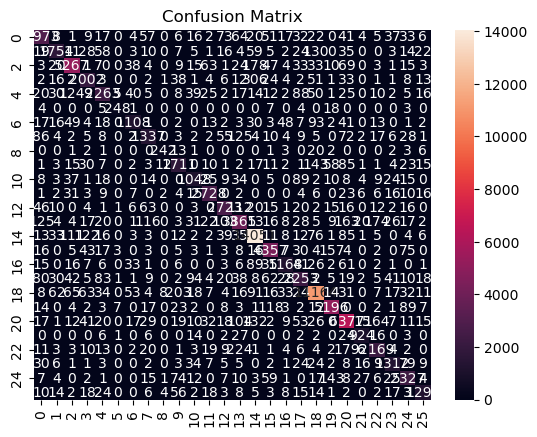

In [54]:
#ploting heatmap for confusion matrix

sns.heatmap(con_metrics, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 1.0256333351135254 seconds


In [56]:
start_time = time.time()
knn_y_test_pred = knn.predict(X_test)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Execution time: 1610.238930463791 seconds


In [57]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, knn_y_test_pred))

print(classification_report(y_test, knn_y_test_pred))

0.9588564432463781
              precision    recall  f1-score   support

           A       0.95      0.97      0.96      3498
           B       0.98      0.88      0.92      2210
           C       0.94      0.98      0.96      5911
           D       0.93      0.87      0.90      2533
           E       0.98      0.91      0.94      2812
           F       0.93      0.92      0.92       290
           G       0.97      0.85      0.91      1473
           H       0.91      0.93      0.92      1789
           I       0.97      0.87      0.92       297
           J       0.94      0.92      0.93      2158
           K       0.94      0.92      0.93      1363
           L       0.92      0.98      0.95      2891
           M       0.99      0.96      0.97      3088
           N       0.95      0.97      0.96      4792
           O       0.96      0.99      0.97     14651
           P       0.92      0.97      0.95      4759
           Q       0.97      0.76      0.85      1519
        

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 143.79427313804626 seconds


In [59]:
start_time = time.time()
dt_y_test_pred = dt.predict(X_test)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 8.536485433578491 seconds


In [60]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, dt_y_test_pred))

print(classification_report(y_test, dt_y_test_pred))

0.9470643196975718
              precision    recall  f1-score   support

           A       0.92      0.92      0.92      3498
           B       0.91      0.87      0.89      2210
           C       0.96      0.97      0.96      5911
           D       0.90      0.91      0.90      2533
           E       0.92      0.92      0.92      2812
           F       0.88      0.77      0.82       290
           G       0.87      0.88      0.87      1473
           H       0.87      0.90      0.89      1789
           I       0.94      0.83      0.88       297
           J       0.92      0.94      0.93      2158
           K       0.91      0.92      0.92      1363
           L       0.96      0.97      0.96      2891
           M       0.93      0.87      0.90      3088
           N       0.94      0.95      0.94      4792
           O       0.98      0.98      0.98     14651
           P       0.96      0.96      0.96      4759
           Q       0.89      0.85      0.87      1519
        

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 310.53367710113525 seconds


In [63]:
# prediction

start_time = time.time()
rf_y_test_pred = rf.predict(X_test)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 9.496785402297974 seconds


In [64]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, rf_y_test_pred))

print(classification_report(y_test, rf_y_test_pred))

0.9859740315530592
              precision    recall  f1-score   support

           A       0.97      0.99      0.98      3498
           B       0.99      0.96      0.98      2210
           C       0.99      0.99      0.99      5911
           D       0.97      0.95      0.96      2533
           E       0.99      0.98      0.98      2812
           F       0.99      0.95      0.97       290
           G       0.99      0.96      0.98      1473
           H       0.98      0.95      0.97      1789
           I       1.00      0.95      0.97       297
           J       0.98      0.97      0.98      2158
           K       0.98      0.97      0.98      1363
           L       0.99      0.99      0.99      2891
           M       0.98      0.97      0.97      3088
           N       0.97      0.99      0.98      4792
           O       0.99      1.00      0.99     14651
           P       0.99      0.99      0.99      4759
           Q       0.99      0.94      0.96      1519
        

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
bars=plt.barh(model_df['Model Name'], model_df['Accuracy'])
plt.ylabel('Model Name')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracies')

for bar in bars:
    width = bar.get_width()
    plt.gca().text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2,
                   f'{width:.1f}', ha='right', va='center', color='white')
plt.tight_layout()

Show the plot
plt.show()